In [2]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [3]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [7]:
ticker=['KMB']
start,end='2014-01-01','2019-02-23'
closes=get_closes(ticker,start,end,freq='d')

In [8]:
ret=closes.pct_change().dropna()

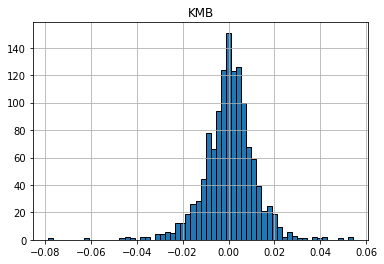

In [9]:
plt.title('KMB')
plt.hist(ret['KMB'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [10]:
a2014=ret.iloc[0:250,]
a2015=ret.iloc[250:501,]
a2016=ret.iloc[501:753,]
a2017=ret.iloc[753:1004,]
a2018=ret.iloc[1004:1255,]

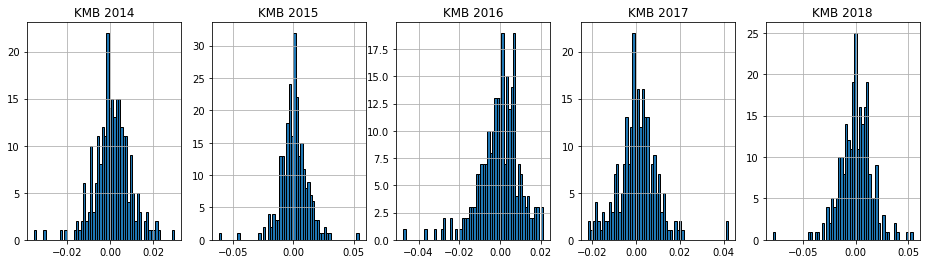

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(151)
plt.title('KMB 2014')
plt.hist(a2014['KMB'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(152)
plt.title('KMB 2015')
plt.hist(a2015['KMB'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(153)
plt.title('KMB 2016')
plt.hist(a2016['KMB'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(154)
plt.title('KMB 2017')
plt.hist(a2017['KMB'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(155)
plt.title('KMB 2018')
plt.hist(a2018['KMB'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()


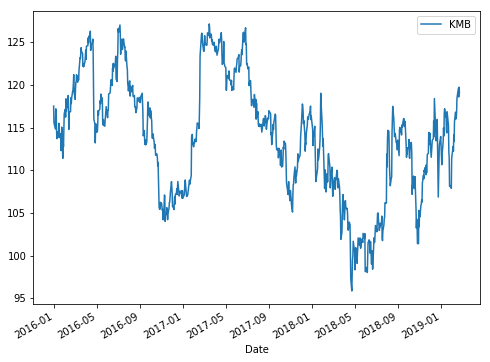

In [12]:
p1618=closes.iloc[502:1294,]
p1618.plot(figsize=(8,6))

### Cambios en los precios


<div class=text-justify> El cambio más significativo se da a finales del 2016, con una caída desde 126 a 203 aproximadamente. Con el pase de los meses se recupera de manera acelerada, para luego iniciar un periodo hasta mediados del 2018 con tendecia negativa. Finalmente, inicia un periodo con tendencia positiva, pero con volatilidades más altas </div>

In [15]:
ret16=p1618.pct_change().dropna()
ret_sum=pd.DataFrame(index=['Rend diario','Rend anual','Vol diaria','Vol anual'],columns=['2016','2017','2018','Todo'])
list=[a2016,a2017,a2018,ret16]
for x in range (0,4):
    ret_sum.loc['Rend diario'][ret_sum.columns[x]]=list[x]['KMB'].mean()
    ret_sum.loc['Rend anual'][ret_sum.columns[x]]=list[x]['KMB'].mean()*252
    ret_sum.loc['Vol diaria'][ret_sum.columns[x]]=list[x]['KMB'].std()
    ret_sum.loc['Vol anual'][ret_sum.columns[x]]=list[x]['KMB'].std()*np.sqrt(252)
ret_sum

,2016,2017,2018,Todo
Rend diario,-0.000335383,0.00042314,-4.51241e-05,8.64732e-05
Rend anual,-0.0845166,0.106631,-0.0113713,0.0217912
Vol diaria,0.00999352,0.00889882,0.0151889,0.0117752
Vol anual,0.158642,0.141264,0.241117,0.186926


### Discusión datos tabla


<div class=text-justify> 2017 es el único año que muestra rendimiento positivo, en general de todo el periodo da .02, que no es muy alto, pero tiene una olatilidad baja del .18. Como se dijo en la gráfica, al final se observa alta volatilidad, como lo dice la tabla en la volatilidad anual en el 2018.  </div>

In [16]:
ret18=ret.iloc[1004:1293,]
ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ticker)
ret_sum.loc['Mean']=ret18.mean()
ret_sum.loc['Volatility']=ret18.std()
n=1000
for x in range (0,3):
    mu= ret_sum['KMB']['Mean']
    sigma= ret_sum['KMB']['Volatility']
    s0=119.999
    listaepsilon = [np.random.randn() for _ in range(n)]
    epsilons = np.asarray(listaepsilon)
    epsilon = pd.DataFrame(columns = ['Epsilon', 'st1','st10','st30','st252'])
    epsilon['Epsilon']= epsilons
    epsilon['st1']= s0*np.exp((mu*.5*sigma**2)*1+sigma*np.sqrt(1)*epsilons)
    epsilon['st10']= s0*np.exp((mu*.5*sigma**2)*10+sigma*np.sqrt(10)*epsilons)
    epsilon['st30']= s0*np.exp((mu*.5*sigma**2)*30+sigma*np.sqrt(30)*epsilons)
    epsilon['st252']= s0*np.exp((mu*.5*sigma**2)*252+sigma*np.sqrt(252)*epsilons)
    st=pd.DataFrame(index=['Mean','liminf','limsup'],columns=epsilon.columns)
    st.loc['Mean']=epsilon.mean()
    st.loc['liminf']=epsilon.min()
    st.loc['limsup']=epsilon.max()
    st=st.drop('Epsilon',1)
    print(st)
    n=n*10

            st1     st10     st30    st252
Mean    120.037  120.206  120.516  123.607
liminf  114.073   102.24  90.9287  53.7038
limsup   125.07   136.78  150.535  231.495
            st1     st10     st30    st252
Mean        120  120.096  120.343  123.318
liminf  113.552   100.77  88.6766  49.9387
limsup  128.361  148.489  173.549  349.635
            st1     st10     st30    st252
Mean    120.009  120.121  120.382  123.381
liminf  112.332  97.3865  83.5828  42.0702
limsup  127.911  146.849  170.243  330.675


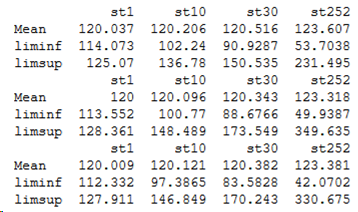